In [0]:
import pandas as pd
import numpy as np
import os
import re

In [0]:
path_to_drive = "drive/My Drive"
path_to_data = os.path.join(path_to_drive,"chatbot/data")
data_filename = "idsngdocumentation.docx"
path_to_kernel = os.path.join(path_to_drive,"chatbot/1_important_keywords")

In [0]:
!pip install python-docx

In [0]:
import docx
def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return '\n'.join(fullText)
data = getText(os.path.join(path_to_data,data_filename)) 

print(data)

In [0]:
#cleaning examples from the text
data = re.sub('example.*?\s(?=Created with the Personal Edition of HelpNDoc)',' ',data)

In [0]:
#splitting data into list of docs lets assume

In [0]:
#creating dataset
dataset = pd.DataFrame()
dataset['text'] = data.split('Created with the Personal Edition of HelpNDoc')

dataset['word_count'] = dataset['text'].apply(lambda x :len(str(x).split(" ")))
dataset.head()

,text,word_count
0,"IDesignSpec (c) 2007-2020 Agnisys, Inc.\n\n\n\...",16
1,: \n\nRelease Notes\nThis section contains rel...,14
2,: \n\nVer 6.32.0.0\nv6.32.0.0 Major Release\n(...,1251
3,: \n\nPrior Release Notes\nThis section contai...,9
4,": \n\nVer 6.24.x.x\nv6.24.0.0\n(August 7th, 20...",1453


In [0]:
dataset.shape

(433, 2)

In [0]:
#descriptive statistics of word counts
dataset.word_count.describe()

count      433.000000
mean       627.073903
std       1314.863272
min          2.000000
25%         90.000000
50%        206.000000
75%        617.000000
max      12457.000000
Name: word_count, dtype: float64

In [0]:
#identifying most common words
freq = pd.Series(" ".join(dataset['text']).split()).value_counts()[:20].keys().tolist()
print(freq)

['the', 'in', 'to', 'is', 'of', ':', 'and', '=', 'for', '.', 'a', 'be', 'register', 'can', 'property', 'are', 'The', 'on', 'will', 'with']


In [0]:
#identifying uncommon words
freq1 = pd.Series(" ".join(dataset['text']).split()).value_counts()[-40:]
freq1

In [0]:
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
nltk.download('wordnet')
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

lem = WordNetLemmatizer()
stem = PorterStemmer()

word = "alias"

print("lemmatization:",lem.lemmatize(word,'v'))
print("stemming:",stem.stem(word))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
lemmatization: alias
stemming: alia


In [0]:
#stopwords :: list
stop_words = set(stopwords.words("english"))

#adding custom words
# stop_words = stop_words.union(freq1)


In [0]:


def preprocess(text):
  #removing punctauations
  # text = re.sub('[^a-zA-Z]',' ',text)
  text = re.sub(' \S+[._]\S+ ',' ',text)
  text = re.sub('[^a-zA-Z]',' ',text)
  # text = re.sub('',' ',text)
  # text = re.sub('',' ',text)
  # text = re.sub('',' ',text)
  #converts to lower
  text = text.lower()
  #removing tags
  text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ", text)
  #removing special characters and digits
  text = re.sub("(\\d|\\W)+"," ",text)
  
  #lemmatization
  lem = WordNetLemmatizer()
  text = [lem.lemmatize(w) for w in text.split(" ") if not w in stop_words]
  text = " ".join(text)
  return text
  

#lets preprocess text data in dataset
dataset["processed"] = dataset.text.apply(lambda x: preprocess(x)) 


In [0]:
#identifying most common words
freq = pd.Series(" ".join(dataset['processed']).split()).value_counts()[:20].keys().tolist()
print(freq)

['register', 'reg', 'block', 'property', 'field', 'id', 'output', 'uvm', 'name', 'value', 'user', 'signal', 'file', 'write', 'bus', 'end', 'read', 'data', 'generated', 'type']


In [0]:
#fetching corpus and vie corpus item
corpus = dataset.processed.to_list() #processed
corpus[234]

' multiple bus domain multiple bus domain compatible id version verilog vhdl alt ralf systemrdl id user specify multiple bus domain block chip resides various domain generally described bus domain template see typically top document domain enumerated template used throughout document say block chip domain following bus domain template inserted bus domain button clicked bus domain name name domain generated output address unit address unit used address domain note first row address unit column take id configure setting address unit value description static text description domain bus bus associated domain bus one following amba ahb amba axi amba apb ocp avalon proprietary note first domain specified bus domain table default domain first row bus column need match id configure setting bus value creating bus domain following example show bus domain template idsword idsexcel id description couple new property introduced specify block chip reg particular domain property block chip level eg a

# Text Preparation

In [0]:
import string
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import re, string, unicodedata
from collections import defaultdict
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

def Normalize(text):
    remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
    #word tokenization
    word_token = nltk.word_tokenize(text.lower().translate(remove_punct_dict)) #.translate(remove_punct_dict)
    # word_token = [ w for w in word_token if "_" not in w]
    #remove ascii
    new_words = []
    for word in word_token:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    
    #Remove tags
    rmv = []
    for w in new_words:
        text=re.sub("&lt;/?.*?&gt;","&lt;&gt;",w)
        rmv.append(text)
        
    #pos tagging and lemmatization
    tag_map = defaultdict(lambda : wn.NOUN)
    tag_map['J'] = wn.ADJ
    tag_map['V'] = wn.VERB
    tag_map['R'] = wn.ADV
    lmtzr = WordNetLemmatizer()
    lemma_list = []
    rmv = [i for i in rmv if i]
    for token, tag in nltk.pos_tag(rmv):
        lemma = lmtzr.lemmatize(token, tag_map[tag[0]])
        lemma_list.append(lemma)
    return lemma_list



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


#introduce word2vec using gensims

In [0]:
#converting data into sentences
import nltk

sentences =[Normalize(preprocess(sent)) for sent in data.split('\n')]
# sentences =[nltk.word_tokenize(sent) for sent in sentences]
sentences =[sent for sent in sentences if sent]
print("length: ", len(sentences))

length:  21383


In [0]:
sentences[1000]

['bug', 'fix']

In [0]:
from gensim.models import Word2Vec

model = Word2Vec(sentences, min_count=1)

In [0]:
def sent_vectorizer(sent, model):
    sent_vec =[]
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
     
    return np.asarray(sent_vec) / numw

In [0]:
X=[]
for sentence in sentences:
  if sentence == " " or sentence == "":
    continue
  elif len(sentence) < 5:
    continue
  X.append(sent_vectorizer(sentence, model))   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [0]:
print (model[model.wv.vocab])

[[-0.0303097   0.03791237 -0.2683595  ...  0.59975404 -0.2899638
   0.02550033]
 [-0.00713816  0.5937838  -0.2163765  ...  0.17206287 -0.66194344
   0.18329366]
 [ 0.08946948  0.25584146 -0.17435253 ...  0.29482317 -0.33192477
   0.04567486]
 ...
 [ 0.00052105  0.01966091 -0.01063912 ...  0.01198905 -0.0230827
   0.01148033]
 [ 0.00437549  0.00701612 -0.00099737 ...  0.00318073 -0.00287539
   0.0016139 ]
 [ 0.00411199  0.01176156 -0.00144239 ...  0.00694337 -0.00876958
   0.00429649]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [0]:
print (model.similarity('register','uvm'))
# print (model.wv.most_similar(positive=['amba'], negative=[], topn=2))

0.64967155


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
#let perform kmeans over sentences
X =np.array(X)
print(X.shape)
print(X[2])

(7311, 100)
[ 0.15595825  0.35509405  0.00001996 -0.23791255 -0.09193041  0.22062026
 -0.0492685  -0.5654733  -0.29116082  0.27203262 -0.12089679  0.23325856
  0.307304    0.253292    0.19681418 -0.06851865  0.43680108  0.5490462
  0.21682112  0.2655526  -0.30351883 -0.16300343 -0.1886723   0.13000807
  0.04888165 -0.05801456 -0.034844    0.32027438  0.13575588  0.1933732
 -0.06372339 -0.1045687  -0.02704518 -0.22447443 -0.2710711  -0.44088873
 -0.12240299 -0.15588646 -0.43027404 -0.17479467 -0.38581038 -0.14548154
  0.34687173  0.03710752  0.16689797 -0.15786344  0.19288385  0.02083579
  0.05709136  0.05757175  0.13899074 -0.05180207  0.4193214  -0.09347423
 -0.49023882  0.3993621  -0.51423174  0.113875   -0.15214813 -0.45173883
 -0.1391804  -0.12019774  0.38738772 -0.06256226  0.07624507 -0.04562267
  0.19856475  0.09165651 -0.10744417  0.00151812  0.11588454 -0.01268182
  0.0284725  -0.13939907  0.28622568 -0.29113472 -0.401987   -0.4754869
 -0.3661646   0.1221104  -0.1927966  -0.12

In [0]:
#Y for over word vectors
vocab = list(model.wv.vocab)
print(vocab)

Y_ = []
for w in vocab:
  Y_.append(model[w])

Y = np.array(Y_)
print(Y.shape," shape")
print(len(Y)," length")


['idesignspec', 'c', 'agnisys', 'inc', 'table', 'content', 'copyright', 'notice', 'user', 'guide', 'right', 'reserve', 'create', 'personal', 'edition', 'helpndoc', 'release', 'note', 'section', 'contain', 'follow', 'suite', 'product', 'ver', 'v', 'major', 'january', 'st', 'withdrawn', 'due', 'slow', 'speed', 'id', 'rtl', 'enhancement', 'axi', 'lite', 'apb', 'aggregation', 'logic', 'support', 'buffer', 'trig', 'reg', 'property', 'trigger', 'vhdl', 'event', 'register', 'enhance', 'take', 'signal', 'read', 'write', 'also', 'case', 'repeat', 'verilog', 'port', 'suffix', 'used', 'change', 'predefined', 'lock', 'even', 'block', 'different', 'width', 'tmr', 'error', 'true', 'detection', 'functionality', 'clock', 'enable', 'add', 'forth', 'argument', 'default', 'gate', 'automatically', 'generate', 'instantiated', 'enb', 'stage', 'delay', 'ext', 'decode', 'external', 'component', 'send', 'output', 'address', 'operation', 'perform', 'sv', 'interface', 'struct', 'level', 'instead', 'systemverilog

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [0]:

from nltk.cluster import KMeansClusterer
NUM_CLUSTERS=2
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(Y_, assign_clusters=True) #X for sentence clustering
print (assigned_clusters)
  
  
  
# for index, sentence in enumerate(sentences):    
#     print (str(assigned_clusters[index]) + ":" + str(sentence))

#for words
for index, sentence in enumerate(vocab):    
    print (str(assigned_clusters[index]) + ":" + str(vocab))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




0:['idesignspec', 'c', 'agnisys', 'inc', 'table', 'content', 'copyright', 'notice', 'user', 'guide', 'right', 'reserve', 'create', 'personal', 'edition', 'helpndoc', 'release', 'note', 'section', 'contain', 'follow', 'suite', 'product', 'ver', 'v', 'major', 'january', 'st', 'withdrawn', 'due', 'slow', 'speed', 'id', 'rtl', 'enhancement', 'axi', 'lite', 'apb', 'aggregation', 'logic', 'support', 'buffer', 'trig', 'reg', 'property', 'trigger', 'vhdl', 'event', 'register', 'enhance', 'take', 'signal', 'read', 'write', 'also', 'case', 'repeat', 'verilog', 'port', 'suffix', 'used', 'change', 'predefined', 'lock', 'even', 'block', 'different', 'width', 'tmr', 'error', 'true', 'detection', 'functionality', 'clock', 'enable', 'add', 'forth', 'argument', 'default', 'gate', 'automatically', 'generate', 'instantiated', 'enb', 'stage', 'delay', 'ext', 'decode', 'external', 'component', 'send', 'output', 'address', 'operation', 'perform', 'sv', 'interface', 'struct', 'level', 'instead', 'systemveri

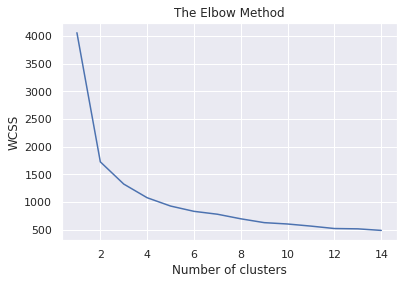

In [0]:
#plot elbow graph    
%matplotlib inline
def plot_elbow_graph(arr,km_init="k-means++"):
    """ helps in finding optimal no. of cluster"""
    wcss = []
    for i in range(1, 15):
        kmeans = KMeans(n_clusters = i, init = km_init, random_state = 42,max_iter = 100, n_init = 1) #random,k-means++
        kmeans.fit(arr)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 15), wcss)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
plot_elbow_graph(arr=Y)

In [0]:
from collections import defaultdict
clustering = defaultdict(list)
n=2
terms = vocab
model = KMeans(n_clusters=n, init="k-means++", max_iter = 100, n_init=10)
model.fit(Y)

for idx, label in enumerate(model.labels_):
    clustering[label].append(terms[idx]) 

In [0]:
for i in range(0,n):
  print("cluster "+str(i+1)+"\n",clustering[i])

cluster 1
 ['inc', 'copyright', 'notice', 'suite', 'ver', 'major', 'january', 'st', 'withdrawn', 'slow', 'aggregation', 'trig', 'suffix', 'used', 'predefined', 'tmr', 'detection', 'forth', 'instantiated', 'ext', 'systemverilog', 'compiler', 'embed', 'preprocessor', 'natively', 'dependency', 'swwel', 'wel', 'rsvdset', 'explicitly', 'rsvdsetx', 'unknown', 'slice', 'assigns', 'errextbus', 'specifies', 'terminate', 'ral', 'posix', 'compliant', 'structs', 'stamp', 'alter', 'camelcase', 'unwanted', 'whitespaces', 'svheader', 'wor', 'wand', 'reqid', 'allows', 'identification', 'souce', 'reflect', 'hal', 'ispresent', 'presence', 'compile', 'append', 'regard', 'checkbox', 'gui', 'folder', 'library', 'agni', 'microcontrollers', 'cm', 'converter', 'eeprom', 'timer', 'period', 'pic', 'programmable', 'route', 'le', 'font', 'company', 'footer', 'fixed', 'flat', 'toc', 'calculation', 'stride', 'square', 'bracket', 'hyperlink', 'cell', 'fille', 'volatile', 'automatic', 'rb', 'sim', 'wave', 'dump', 'wi

In [0]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
  
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
  
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))


Cluster id labels for inputted data
[0 0 0 ... 0 0 0]
Centroids data
[[ 2.48155981e-01  7.17793763e-01 -6.07228637e-01  2.70388663e-01
   2.31930375e-01  1.62411779e-02 -6.64352477e-01 -5.85265756e-01
  -3.91383946e-01  1.04268777e+00  1.03529048e+00  7.23990023e-01
   3.22563022e-01 -3.00659448e-01  1.01867594e-01 -8.89955938e-01
  -1.17741928e-01  4.16682959e-01  7.98426449e-01  6.67336762e-01
  -1.08999383e+00 -3.32704425e-01 -2.54639626e-01 -2.83617616e-01
   9.39219221e-02 -4.06203195e-02 -7.25501180e-02  8.16068053e-01
  -5.97876966e-01  3.40212405e-01 -1.88542157e-02 -8.86634439e-02
  -8.72218072e-01 -5.51824868e-01  1.14455044e-01 -1.26296550e-01
  -1.71482995e-01 -3.22987735e-02 -8.63832295e-01  5.73323846e-01
  -9.00176689e-02  8.73750925e-01 -7.18989149e-02 -8.78863931e-02
  -3.59217286e-01 -1.30234197e-01  1.84466064e-01  5.38503945e-01
  -3.23442966e-01  5.57799101e-01  2.73842633e-01  4.29814428e-01
  -3.60144675e-02 -3.71147335e-01 -3.82323295e-01  5.83522469e-02
  -6.98

In [0]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
  
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.48853076


0 idesignspec
0 c
0 agnisys
0 inc
0 table
0 content
0 copyright
0 notice
0 user
0 guide
0 right
0 reserve
0 create
0 personal
0 edition
0 helpndoc
0 release
0 note
1 section
0 contain
0 follow
0 suite
0 product
1 ver
0 v
0 major
0 january
0 st
0 withdrawn
0 due
0 slow
0 speed
0 id
0 rtl
0 enhancement
0 axi
0 lite
0 apb
0 aggregation
0 logic
0 support
1 buffer
1 trig
1 reg
1 property
1 trigger
0 vhdl
1 event
1 register
0 enhance
0 take
1 signal
1 read
1 write
0 also
0 case
1 repeat
0 verilog
0 port
0 suffix
0 used
0 change
0 predefined
1 lock
0 even
1 block
0 different
1 width
0 tmr
0 error
0 true
0 detection
0 functionality
0 clock
1 enable
0 add
0 forth
0 argument
1 default
0 gate
0 automatically
0 generate
0 instantiated
1 enb
0 stage
0 delay
0 ext
1 decode
1 external
1 component
0 send
0 output
1 address
1 operation
0 perform
0 sv
0 interface
0 struct
0 level
0 instead
0 systemverilog
1 byte
0 bus
0 remove
0 systemrdl
0 compiler
0 make
0 command
0 line
0 switch
1 back
0 use
0 embed


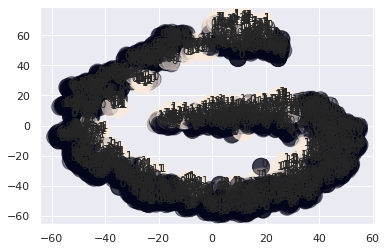

In [0]:
#plotting using t-SNE
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE
 
tmodel = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
 
Y=tmodel.fit_transform(Y)
 
 
plt.scatter(Y[:, 0], Y[:, 1], c=assigned_clusters, s=290,alpha=.5)
 
 
for j in range(len(vocab)):    
   plt.annotate(assigned_clusters[j],xy=(Y[j][0], Y[j][1]),xytext=(0,0),textcoords='offset points')
   print ("%s %s" % (assigned_clusters[j],  vocab[j]))
 
 
plt.show()